#### Import necessary libraries

In [175]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Task #1 - Merging 12 months data

In [149]:
path = r'.\Sales_Data'
all_files = glob.glob(os.path.join(path , "*.csv"))
li = []
for filename in all_files:
    df_temp = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_temp)

df = pd.concat(li, axis=0, ignore_index=True)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [151]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Variant #2

In [152]:
files = [file for file in os.listdir('.\Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    #print(file)
    df2 = pd.read_csv(".\Sales_Data\\"+ file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data = all_months_data.drop_duplicates()
all_months_data.to_csv("all_sales_data.csv", index=False)

In [153]:
all_data = pd.read_csv('all_sales_data.csv')
all_data.head()

C:\Users\nsm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean up the Data

In [154]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
all_data = all_data.dropna(how='all')
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Find any wrong data and delete

In [156]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert data type

In [157]:
#all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
#all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [158]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 185687
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  object 
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


## Question 1 - What was the best month for sales? How much was earned that month?

### Task #2 - Add month column

In [159]:
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task #3 - Add sales column

In [160]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [161]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [162]:
#all_data.loc[all_data["Quantity Ordered"] == NaN, "Quantity Ordered"] = 0
#all_data.replace(NaN, 0)
#data_types_dict = {'Quantity Ordered': int}
#all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(float)
#all_data = all_data.astype(data_types_dict)
#all_data.info()

### Answer #1

In [163]:
all_data.groupby('Month').sum().sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28074,4.583268e+06,4.608296e+06
10,22669,3.713609e+06,3.734778e+06
4,20536,3.366219e+06,3.389218e+06
11,19769,3.178873e+06,3.197875e+06
5,18653,3.133135e+06,3.150616e+06
3,16979,2.789085e+06,2.804973e+06
7,16054,2.631225e+06,2.646461e+06
6,15234,2.560504e+06,2.576280e+06
8,13429,2.226964e+06,2.241083e+06


In [164]:
results = all_data.groupby('Month').sum()

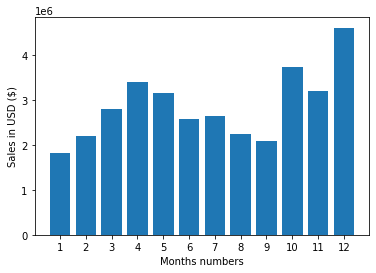

In [165]:
months_nums = range(1, 13)
plt.bar(months_nums, results['Sales'])
plt.xticks(months_nums)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months numbers')
plt.show()

## Question 2 - What city had the best sales?

### Task #4 - Add City column

In [166]:
all_data['City Sales'] = all_data['Purchase Address'].str.split(',',expand=True)[1] + all_data['Purchase Address'].str.split(',',expand=True)[2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001


In [167]:
all_data.groupby('City Sales').sum().sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Month,Sales
City Sales,,,,
San Francisco CA 94016,50169,8.204001e+06,314949,8.254744e+06
Los Angeles CA 90001,33247,5.417172e+06,208020,5.448304e+06
New York City NY 10001,27903,4.632921e+06,175557,4.661867e+06
Boston MA 02215,22494,3.634398e+06,140898,3.658628e+06
Atlanta GA 30301,16584,2.778609e+06,104649,2.794199e+06
Dallas TX 75001,16707,2.750026e+06,104447,2.765374e+06
Seattle WA 98101,16534,2.730587e+06,104817,2.745046e+06
Portland OR 97035,11291,1.859836e+06,70517,1.870011e+06
Austin TX 73301,11137,1.808340e+06,69720,1.818044e+06


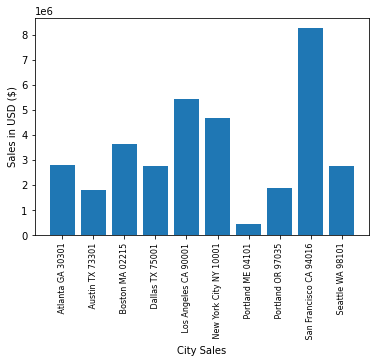

In [168]:
results2 = all_data.groupby('City Sales').sum()
#cities = all_data['City Sales'].unique() 
cities = [city for city, df in all_data.groupby('City Sales')]
plt.bar(cities, results2['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Sales')
plt.show()

## Question 3 - Which the best time for Ad?

In [169]:
#all_data['Time Sales'] = all_data['Order Date'].str.split(' ',expand=True)[1]
#all_data = all_data.drop(columns='Time Sales')
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001


In [170]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,9,27


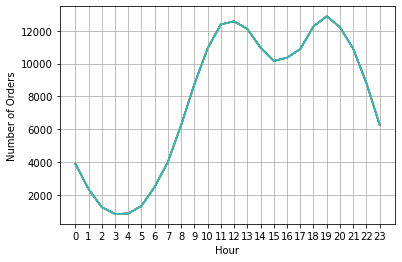

In [171]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
#all_data.groupby(['Hour']).count()
plt.show()

## Question 4 - What products are most often sold together?

In [174]:
results3 = all_data[all_data['Order ID'].duplicated(keep=False)]
results3['Grouped products'] = results3.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
results3 = results3[['Order ID', 'Grouped products']].drop_duplicates()
results3.head()

<ipython-input-174-dba29de379ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results3['Grouped products'] = results3.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [176]:
count = Counter()
for row in results3['Grouped products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(10)    :
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Question 5 - What product sold the most? Why?

In [177]:
product_group = all_data.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4126,450739.02,29319,453818.74,58729,122096
27in 4K Gaming Monitor,6239,2427687.75,44396,2433147.61,90841,184129
27in FHD Monitor,7541,1124625.02,52484,1131074.59,107422,219659
34in Ultrawide Monitor,6192,2346058.26,43258,2352898.08,88957,183318
AA Batteries (4-pack),27615,78942.72,145423,106041.60,298077,608560
AAA Batteries (4-pack),30986,61629.88,146149,92648.14,296904,611350
Apple Airpods Headphones,15637,2328750.00,109304,2345550.00,222938,454935
Bose SoundSport Headphones,13430,1329667.02,93918,1342865.70,192077,391667
Flatscreen TV,4813,1438200.00,34172,1443900.00,68719,142629


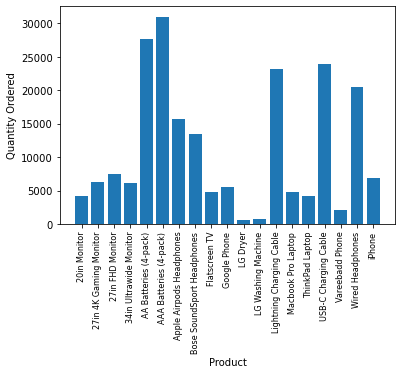

In [181]:
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

In [ ]:
prices = all_data.groupby('Product').mean()['Price Each']